Here in this problem we want to approximate:
 $f(x) = \frac{1}{x} \int_{0}^{x} \frac{\sin(t)}{t} \, dt$
 on the interval $|x| < 1$ with an absolute error $\le 5 \times 10^{-9}$

 1. Derivation of the Taylor Series

 We express $\sin(t)$ as a Taylor series centered at 0:
$$\sin(t) = \sum_{n=0}^{\infty} \frac{(-1)^n t^{2n+1}}{(2n+1)!} = t - \frac{t^3}{3!} + \frac{t^5}{5!} - \dots$$

Dividing by $t$ to get the integrand:
$$\frac{\sin(t)}{t} = \sum_{n=0}^{\infty} \frac{(-1)^n t^{2n}}{(2n+1)!} = 1 - \frac{t^2}{3!} + \frac{t^4}{5!} - \dots$$

Now, we integrate term-by-term from $0$ to $x$:
$$\int_{0}^{x} \frac{\sin(t)}{t} \, dt = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!(2n+1)}$$

Finally, we divide by $x$ to find $f(x)$:
$$f(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n}}{(2n+1)!(2n+1)}$$

The terms of the series are:
$$f(x) = 1 - \frac{x^2}{3 \cdot 3!} + \frac{x^4}{5 \cdot 5!} - \frac{x^6}{7 \cdot 7!} + \frac{x^8}{9 \cdot 9!} - \dots$$

2. Determining the Degree of the Polynomial


 Here we understood a very important concept that for any alternating series like this, the error we make by stopping at a certain term is less than or equal to the very next term you left out.

 Also here we tested $x=1$ because that is where the Taylor series is least accurate within range.

Because this is an alternating series where the magnitude of the terms is strictly decreasing for $|x| < 1$, the error $E$ of a polynomial truncated at term $n$ is bounded by the magnitude of the first omitted term ($n+1$):
$$ |E| \le |a_{n+1}| = \frac{|x|^{2(n+1)}}{(2(n+1)+1)!(2(n+1)+1)} $$

To find the required $n$ for an error $\le 5 \times 10^{-9}$ at the worst case ($x=1$):
* For $n=3$ (Degree 6): $\frac{1}{9 \cdot 9!} \approx 3.06 \times 10^{-7}$ (Too large)
* For $n=4$ (Degree 8): $\frac{1}{11 \cdot 11!} \approx 2.27 \times 10^{-9}$ (Meets the requirement)

Therefore, we will use a **Taylor polynomial of degree 8**.

The below is the code for computing the error between the library function which is used and the function we have above generated step wise

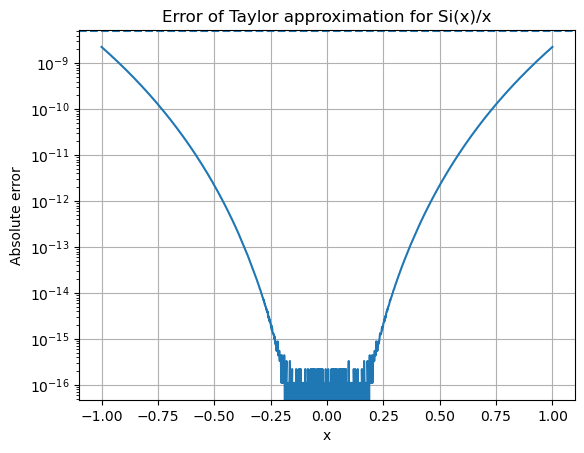

Max error: 2.2651620579239307e-09


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from math import factorial

# exact function
def f_exact(x):
    Si, _ = sici(x)
    return Si / x

# general Taylor polynomial
def f_taylor(x, N):
    """
    N = highest n included in the sum
    f(x) = sum_{n=0}^N (-1)^n x^(2n) / ((2n+1)(2n+1)!)
    """
    s = np.zeros_like(x, dtype=float)
    for n in range(N + 1):
        term = ((-1)**n * x**(2*n)) / ((2*n + 1) * factorial(2*n + 1))
        s += term
    return s

# x range
x = np.linspace(-1, 1, 2000)
x[1000] = 1e-15   # avoid division by zero

# choose N = 4 (error controlled by n=5 term)
N = 4

# compute
exact = f_exact(x)
approx = f_taylor(x, N)
error = np.abs(exact - approx)

# plot error
plt.figure()
plt.semilogy(x, error)
plt.axhline(5e-9, linestyle='--')
plt.xlabel("x")
plt.ylabel("Absolute error")
plt.title("Error of Taylor approximation for Si(x)/x")
plt.grid(True)
plt.show()

print("Max error:", np.max(error))


3. Results and Conclusion
The plot shows that the absolute error between the Taylor polynomial and the library function remains below the $5 \times 10^{-9}$ threshold across the entire interval $|x| < 1$. 

The maximum error occurs at the boundaries $x = \pm 1$, where it is approximately $2.27 \times 10^{-9}$, confirming that our degree-8 polynomial is mathematically sufficient for the required precision.